In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split

# El objeto de la tarea es utilizar un mecanismo de cluster antes de hacer un modelo de predicción y compararlo con los resultados del mismo modelo sin haber hecho previamente la clusterizacion de los datos.

In [33]:
import os
os.getcwd()

'C:\\Users\\Eduardo\\Desktop\\Repositorio Machine Learning\\K-medias'

### Cargar los datos desde repositorio online: 

In [34]:
ABALONE = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',delimiter=',',header=None)
ABALONE.columns = ["Sex","Length","Diameter","Height","Whole_weight",
                  "Shucked_weight","Viscera_weight","Shell_weight","Rings"]

# Describiendo la base abalone
ABALONE.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [40]:
ABALONE.Sex = ABALONE.Sex.astype('category').cat.codes

#Separo Y de X (Y será Rings y no aparecerá en la matriz X)
Y = ABALONE["Rings"]
X = ABALONE.drop('Rings', 1)

#Dividiendo el conjunto de entrenamiento
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.20, random_state=136800)

#Normalizando la información con la paquetria StndScaler
scaler = preprocessing.StandardScaler().fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

### Modelo SIN Clusters

In [41]:

print("Accuracy:")
#Random Forest:
clfR = RandomForestClassifier()
clfR = clfR.fit(xtrain, ytrain)
y_predR = clfR.predict(xtest)
rf_y_score = metrics.accuracy_score(ytest, y_predR)
print("Random Forest sin creación de clusters previa: %f" % rf_y_score)

Accuracy:
Random Forest sin creación de clusters previa: 0.234450


### Modelo CON 10 Clusters

In [37]:
k=10
km = KMeans(n_clusters=k, init="k-means++", n_init=10, 
                      max_iter=300, tol=0.0001, precompute_distances="auto", 
                      verbose=0, random_state=None, copy_x=True, 
                      n_jobs=1, algorithm="auto").fit(X)
label = km.labels_

#Aca se dividen data clusterizado
msk = np.random.rand(len(ABALONE)) < 0.80
train = ABALONE[msk]
ytrain = train["Rings"]
xtrain = train.drop('Rings', 1)

test = ABALONE[~msk]
ytest = test["Rings"]
xtest = test.drop('Rings', 1)

labeln = label[msk]
labelt = label[~msk]

#Normalize data:
scaler = preprocessing.StandardScaler().fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

### Modelo Bosque Aleatorio despues de realizar 10-Medias

In [39]:
import warnings
warnings.filterwarnings('ignore')
k_hl = np.zeros(k)
k_rf = np.zeros(k)
for i in range(k):
    #hl_clf = MLPClassifier(solver='adam', alpha=1,random_state=10, hidden_layer_sizes=(9,9,9))
    clfR = RandomForestClassifier()
    
    X_tr = xtrain[labeln == i]
    Y_tr = ytrain[labeln == i]
    #Neural net
    #hl_clf.fit(X_tr, Y_tr.ravel()) 
    #Random Forest:
    clfR = clfR.fit(xtrain, ytrain)
    
    #Resultados:
    print("Predicción cluster:",i)
    #hl_ypred = hl_clf.predict(xtest[labelt == i])
    #k_hl[i] = metrics.accuracy_score(ytest[labelt == i], hl_ypred)
    #print("Deep NN:       %f" % k_hl[i])
    y_predR = clfR.predict(xtest[labelt == i])
    k_rf[i] = metrics.accuracy_score(ytest[labelt == i], y_predR)
    print("Random Forest: %f" % k_rf[i])

Predicción cluster: 0
Random Forest: 0.162791
Predicción cluster: 1
Random Forest: 0.208333
Predicción cluster: 2
Random Forest: 0.212389
Predicción cluster: 3
Random Forest: 0.166667
Predicción cluster: 4
Random Forest: 0.216216
Predicción cluster: 5
Random Forest: 0.282609
Predicción cluster: 6
Random Forest: 0.153846
Predicción cluster: 7
Random Forest: 0.128440
Predicción cluster: 8
Random Forest: 0.216216
Predicción cluster: 9
Random Forest: 0.336449


# Comparativo

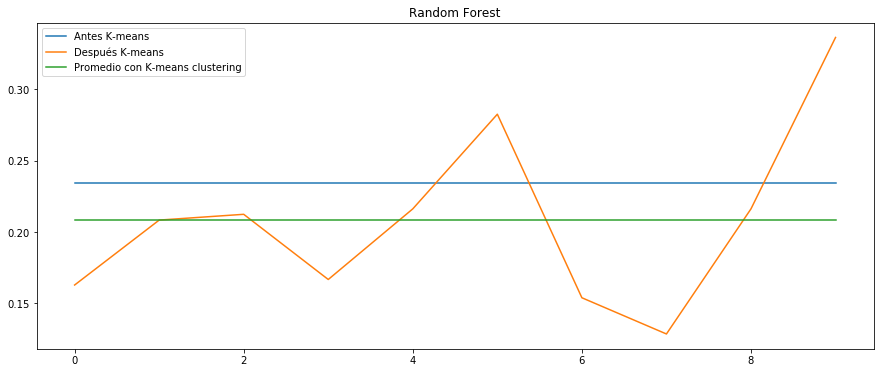

In [53]:
plt.figure(figsize=(15,6))
plt.plot([0,k-1],[rf_y_score,rf_y_score])
plt.plot(range(0,k),k_rf)
#El promedio de los resultados de cada cluster
prf = np.mean(k_rf)
plt.plot([0,k-1],[prf,prf])
plt.legend(["Antes K-means","Después K-means","Promedio con K-means clustering"])
plt.title("Random Forest")

plt.show()

En la gráfica se ve cómo la accuracy con k-means fue muy variantey en algunos casos (como el cluster = 5) fue más alto, sin embargo el promedio del accuracy "general" fue de: 

In [57]:
print(int(prf*100),'%')

20 %


Y cuando se compara con la accuracy sin aplicar el preprocesimiento por k-means fue de:

In [59]:
print(int(rf_y_score*100),'%')

23 %


Por lo que en este caso, el preprocesamiento por K-means significo una perdida de accuracy de :

In [61]:
print(int((rf_y_score - prf)*100),'%')

2 %
